In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wilcoxon
from scipy.stats import norm

In [2]:
df = pd.read_csv(os.path.join("..", "results_v3.tsv"), header=0, sep="\t")
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6022,pp126,F,41,MS,Fast,NaN,left_ankle,IC,182.0,177.0,5.0,25.0,1,1,1,0,0,1
6023,pp126,F,41,MS,Fast,NaN,left_ankle,IC,425.0,426.0,-1.0,-5.0,1,1,1,0,0,1
6024,pp126,F,41,MS,Fast,NaN,left_ankle,IC,654.0,655.0,-1.0,-5.0,1,1,1,0,0,1
6025,pp126,F,41,MS,Fast,NaN,left_ankle,IC,877.0,876.0,1.0,5.0,1,1,1,0,0,1
6026,pp126,F,41,MS,Fast,NaN,left_ankle,FC,74.0,74.0,0.0,0.0,1,1,1,0,0,1


In [3]:
for item in df["run"].unique():
    if not isinstance(item, str):
        print(np.isnan(item))
    else:
        print(f"Run: {item:s}")

True
Run: off
Run: on
Run: schub


In [4]:
df_gait_metrics = {"sub_id": [],
                   "gender": [],
                   "age": [],
                   "participant_type": [],
                   "task": [],
                   "run": [],
                   "tracked_point": [],
                   "ix_ref": [],
                   "ix_pred": [],
                   "stride_time_ref": [],
                   "stride_time_pred": [],
                   "stance_time_ref": [],
                   "stance_time_pred": [],
                   "swing_time_ref": [],
                   "swing_time_pred": []}

for sub_id in df["sub_id"].unique():
    # print(f"{sub_id}")
    df_sel = df.loc[df["sub_id"]==sub_id]
    for task in df_sel["task"].unique():
        # print(f"    {task:s}")
        df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task)]
        for run in df_sel["run"].unique():
            if not isinstance(run, str):
                for tracked_point in df_sel["tracked_point"].unique():
                    # print(f"        {tracked_point}")
                    df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]==tracked_point)]
                    gender = df_sel["gender"].iloc[0]
                    age = df_sel["age"].iloc[0]
                    participant_type = df_sel["participant_type"].iloc[0]
                    if not(df_sel[["ix_ref", "ix_pred"]].isna().any().any()):
                        ix_IC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_ref"].values[:])
                        ix_IC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_pred"].values[:])
                        ix_FC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_ref"].values[:])
                        ix_FC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_pred"].values[:])
                        if len(ix_IC_ref)==0 or len(ix_IC_pred)==0 or len(ix_FC_ref)==0 or len(ix_FC_pred)==0:
                            continue
                        for i in range(len(ix_IC_ref)-1):
                            stride_time_ref = ( ix_IC_ref[i+1] - ix_IC_ref[i] ) / 200
                            stride_time_pred = ( ix_IC_pred[i+1] - ix_IC_pred[i] ) / 200
                            f = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
                            stance_time_ref = ( ix_FC_ref[f] - ix_IC_ref[i] ) / 200
                            stance_time_pred = ( ix_FC_pred[f] - ix_IC_pred[i] ) / 200
                            swing_time_ref = ( ix_IC_ref[i+1] - ix_FC_ref[f] ) / 200
                            swing_time_pred = ( ix_IC_pred[i+1] - ix_FC_pred[f] ) / 200
                            
                            # Add to dict
                            df_gait_metrics["sub_id"].append(sub_id)
                            df_gait_metrics["gender"].append(gender)
                            df_gait_metrics["age"].append(age)
                            df_gait_metrics["participant_type"].append(participant_type)
                            df_gait_metrics["task"].append(task)
                            df_gait_metrics["run"].append("")
                            df_gait_metrics["tracked_point"].append(tracked_point)
                            df_gait_metrics["ix_ref"].append(ix_IC_ref[i])
                            df_gait_metrics["ix_pred"].append(ix_IC_pred[i])
                            df_gait_metrics["stride_time_ref"].append(stride_time_ref)
                            df_gait_metrics["stride_time_pred"].append(stride_time_pred)
                            df_gait_metrics["stance_time_ref"].append(stance_time_ref)
                            df_gait_metrics["stance_time_pred"].append(stance_time_pred)
                            df_gait_metrics["swing_time_ref"].append(swing_time_ref)
                            df_gait_metrics["swing_time_pred"].append(swing_time_pred)
            else:
                df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"]==run)]
                for tracked_point in df_sel["tracked_point"].unique():
                    # print(f"        {tracked_point}")
                    df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"]==run) & (df["tracked_point"]==tracked_point)]
                    gender = df_sel["gender"].iloc[0]
                    age = df_sel["age"].iloc[0]
                    participant_type = df_sel["participant_type"].iloc[0]
                    if not(df_sel[["ix_ref", "ix_pred"]].isna().any().any()):
                        ix_IC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_ref"].values[:])
                        ix_IC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_pred"].values[:])
                        ix_FC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_ref"].values[:])
                        ix_FC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_pred"].values[:])
                        if len(ix_IC_ref)==0 or len(ix_IC_pred)==0 or len(ix_FC_ref)==0 or len(ix_FC_pred)==0:
                            continue
                        for i in range(len(ix_IC_ref)-1):
                            stride_time_ref = ( ix_IC_ref[i+1] - ix_IC_ref[i] ) / 200
                            stride_time_pred = ( ix_IC_pred[i+1] - ix_IC_pred[i] ) / 200
                            f = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
                            stance_time_ref = ( ix_FC_ref[f] - ix_IC_ref[i] ) / 200
                            stance_time_pred = ( ix_FC_pred[f] - ix_IC_pred[i] ) / 200
                            swing_time_ref = ( ix_IC_ref[i+1] - ix_FC_ref[f] ) / 200
                            swing_time_pred = ( ix_IC_pred[i+1] - ix_FC_pred[f] ) / 200
                            
                            # Add to dict
                            df_gait_metrics["sub_id"].append(sub_id)
                            df_gait_metrics["gender"].append(gender)
                            df_gait_metrics["age"].append(age)
                            df_gait_metrics["participant_type"].append(participant_type)
                            df_gait_metrics["task"].append(task)
                            df_gait_metrics["run"].append(run)
                            df_gait_metrics["tracked_point"].append(tracked_point)
                            df_gait_metrics["ix_ref"].append(ix_IC_ref[i])
                            df_gait_metrics["ix_pred"].append(ix_IC_pred[i])
                            df_gait_metrics["stride_time_ref"].append(stride_time_ref)
                            df_gait_metrics["stride_time_pred"].append(stride_time_pred)
                            df_gait_metrics["stance_time_ref"].append(stance_time_ref)
                            df_gait_metrics["stance_time_pred"].append(stance_time_pred)
                            df_gait_metrics["swing_time_ref"].append(swing_time_ref)
                            df_gait_metrics["swing_time_pred"].append(swing_time_pred) 
                    

In [5]:
df_gait_metrics = pd.DataFrame(df_gait_metrics)

In [6]:
# df_gait_metrics.to_csv("gait_metrics_v3.tsv", sep="\t")

In [7]:
def bland_altman_plot(m1, m2, sd_limit=1.96, ax=None, annotate=True, 
                        scatter_kwds=None, mean_line_kwds=None, limit_lines_kwds=None):
    """
    Construct a Tukey/Bland-Altman Mean Difference Plot.

    Tukey's Mean Difference Plot (also known as a Bland-Altman plot) is a
    graphical method to analyze the differences between two methods of
    measurement. The mean of the measures is plotted against their difference.

    For more information see
    https://en.wikipedia.org/wiki/Bland-Altman_plot

    Parameters
    ----------
    m1 : array_like
        A 1-d array.
    m2 : array_like
        A 1-d array.
    sd_limit : float
        The limit of agreements expressed in terms of the standard deviation of
        the differences. If `md` is the mean of the differences, and `sd` is
        the standard deviation of those differences, then the limits of
        agreement that will be plotted are md +/- sd_limit * sd.
        The default of 1.96 will produce 95% confidence intervals for the means
        of the differences. If sd_limit = 0, no limits will be plotted, and
        the ylimit of the plot defaults to 3 standard deviations on either
        side of the mean.
    ax : AxesSubplot
        If `ax` is None, then a figure is created. If an axis instance is
        given, the mean difference plot is drawn on the axis.
    scatter_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.scatter plotting method
    mean_line_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.axhline plotting method
    limit_lines_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.axhline plotting method

    Returns
    -------
    Figure
        If `ax` is None, the created figure.  Otherwise the figure to which
        `ax` is connected.

    References
    ----------
    Bland JM, Altman DG (1986). "Statistical methods for assessing agreement
    between two methods of clinical measurement"

    Examples
    --------

    Load relevant libraries.

    >>> import statsmodels.api as sm
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt

    Making a mean difference plot.

    >>> # Seed the random number generator.
    >>> # This ensures that the results below are reproducible.
    >>> np.random.seed(9999)
    >>> m1 = np.random.random(20)
    >>> m2 = np.random.random(20)
    >>> f, ax = plt.subplots(1, figsize = (8,5))
    >>> sm.graphics.mean_diff_plot(m1, m2, ax = ax)
    >>> plt.show()

    .. plot:: plots/graphics-mean_diff_plot.py
    """
    if ax is None:
        try:
            import matplotlib.pyplot as plt
        except:
            raise ImportError("Matplotlib is not found.")
        fig = plt.figure()
        ax = fig.add_subplot(111)
    else:
        fig = ax.figure

    if len(m1) != len(m2):
        raise ValueError('m1 does not have the same length as m2.')
    if sd_limit < 0:
        raise ValueError('sd_limit ({}) is less than 0.'.format(sd_limit))

    means = np.mean([m1, m2], axis=0)
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)

    scatter_kwds = scatter_kwds or {}
    if 's' not in scatter_kwds:
        scatter_kwds['s'] = 20
    mean_line_kwds = mean_line_kwds or {}
    limit_lines_kwds = limit_lines_kwds or {}
    for kwds in [mean_line_kwds, limit_lines_kwds]:
        if 'color' not in kwds:
            kwds['color'] = 'gray'
        if 'linewidth' not in kwds:
            kwds['linewidth'] = 1
    if 'linestyle' not in mean_line_kwds:
        kwds['linestyle'] = '--'
    if 'linestyle' not in limit_lines_kwds:
        kwds['linestyle'] = ':'

    ax.scatter(means, diffs, **scatter_kwds) # Plot the means against the diffs.
    ax.axhline(mean_diff, **mean_line_kwds)  # draw mean line.

    # Annotate mean line with mean difference.
    if annotate:
        ax.annotate('mean diff:\n{}'.format(np.round(mean_diff, 2)),
                    xy=(0.99, 0.5),
                    horizontalalignment='right',
                    verticalalignment='center',
                    fontsize=14,
                    xycoords='axes fraction')

    if sd_limit > 0:
        half_ylim = (1.5 * sd_limit) * std_diff
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)
        limit_of_agreement = sd_limit * std_diff
        lower = mean_diff - limit_of_agreement
        upper = mean_diff + limit_of_agreement
        for j, lim in enumerate([lower, upper]):
            ax.axhline(lim, **limit_lines_kwds)
        if annotate:
            range_lim = (0.20 - (-0.20))
            low_lim = (lower - (-0.20))/(0.20 - (-0.20))
            high_lim = (upper - (-0.20))/(0.20 - (-0.20))
            ax.annotate(f'-{sd_limit} SD: {lower:0.2g}',
                        xy=(0.99, low_lim-0.02*range_lim), # (0.99, 0.07),
                        horizontalalignment='right',
                        verticalalignment='top',
                        fontsize=14,
                        xycoords='axes fraction')
            ax.annotate(f'+{sd_limit} SD: {upper:0.2g}',
                        xy=(0.99, high_lim+0.02*range_lim), # (0.99, 0.92),
                        horizontalalignment='right',
                        verticalalignment='bottom',
                        fontsize=14,
                        xycoords='axes fraction')
    elif sd_limit == 0:
        half_ylim = 3 * std_diff
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)

    ax.set_ylabel('Difference', fontsize=15)
    ax.set_xlabel('Means', fontsize=15)
    ax.tick_params(labelsize=13)
    fig.tight_layout()
    return fig

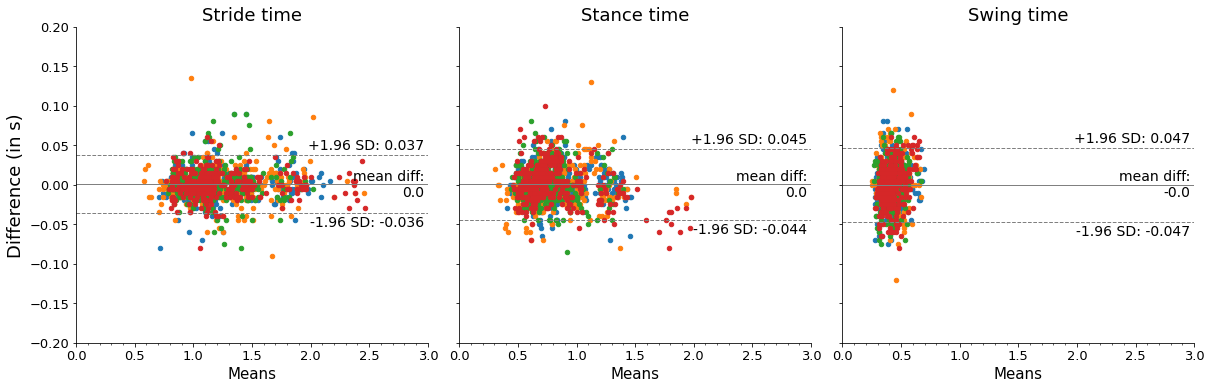

In [8]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 3, figsize=(43*cm, 14*cm), sharey=True)
bland_altman_plot(df_gait_metrics.stride_time_ref, df_gait_metrics.stride_time_pred, ax=axs[0], annotate=True, scatter_kwds=dict(c="w", alpha=0.01))
bland_altman_plot(df_gait_metrics.stance_time_ref, df_gait_metrics.stance_time_pred, ax=axs[1], annotate=True, scatter_kwds=dict(c="w", alpha=0.01))
bland_altman_plot(df_gait_metrics.swing_time_ref, df_gait_metrics.swing_time_pred, ax=axs[2], annotate=True, scatter_kwds=dict(c="w", alpha=0.01))
for tracked_point in ["left_ankle", "right_ankle", "left_shank", "right_shank"]:
    df_sel = df_gait_metrics.loc[df_gait_metrics["tracked_point"]==tracked_point]
    bland_altman_plot(df_sel.stride_time_ref, df_sel.stride_time_pred, ax=axs[0], annotate=False, mean_line_kwds=dict(ls="none"), limit_lines_kwds=dict(ls="none"))
    bland_altman_plot(df_sel.stance_time_ref, df_sel.stance_time_pred, ax=axs[1], annotate=False, mean_line_kwds=dict(ls="none"), limit_lines_kwds=dict(ls="none"))
    bland_altman_plot(df_sel.swing_time_ref, df_sel.swing_time_pred, ax=axs[2], annotate=False, mean_line_kwds=dict(ls="none"), limit_lines_kwds=dict(ls="none"))
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].set_title("Stride time", size=18)
axs[0].set_ylabel("Difference (in s)", size=18)
axs[0].set_xticks(np.arange(0, 3.5, 0.5))
axs[0].xaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].set_title("Stance time", size=18)
axs[1].set_ylabel("")
axs[1].set_xticks(np.arange(0, 3.5, 0.5))
axs[1].xaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[2].set_title("Swing time", size=18)
axs[2].set_ylabel("")
axs[2].set_xticks(np.arange(0, 3.5, 0.5))
axs[2].xaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs[0].set_ylim((-0.20, 0.20))
plt.tight_layout()
# plt.savefig("D:\\Projects\\my-gait-events-tcn\\paper\\MDPI_template\\fig\\bland_altman_plots_stride_params.png", dpi=300)
plt.savefig("../paper/MDPI_template/fig/bland_altman_plots_stride_params.png", dpi=300)
plt.show()

In [27]:
alpha = 0.05

for tracked_point in ["left_ankle", "right_ankle", "left_shank", "right_shank"]:
    df_sel = df_gait_metrics.loc[df_gait_metrics["tracked_point"]==tracked_point]
    
    # Stride time
    m1 = df_sel.stride_time_ref
    m2 = df_sel.stride_time_pred
    means = np.mean([m1, m2], axis=0)
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)
    limit_of_agreement = norm.ppf(1-(alpha/2)) * std_diff
    lower_lim = mean_diff - limit_of_agreement
    upper_lim = mean_diff + limit_of_agreement
    statistic, pvalue = wilcoxon(m1, m2, alternative="two-sided")
    print(f"{tracked_point.replace('_', ' '):>12s}{'stride time':>12s}{mean_diff:>8.3f}{lower_lim:>8.3f}{upper_lim:>8.3f}{pvalue:>8.3f} {statistic:>1.3f}")
    
    # Stance time
    m1 = df_sel.stance_time_ref
    m2 = df_sel.stance_time_pred
    means = np.mean([m1, m2], axis=0)
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)
    limit_of_agreement = norm.ppf(1-(alpha/2)) * std_diff
    lower_lim = mean_diff - limit_of_agreement
    upper_lim = mean_diff + limit_of_agreement
    statistic, pvalue = wilcoxon(m1, m2, alternative="two-sided")
    print(f"{12*' ':>12s}{'stance time':>12s}{mean_diff:>8.3f}{lower_lim:>8.3f}{upper_lim:>8.3f}{pvalue:>8.3f} {statistic:>1.3f}")
    
    # Swing time
    m1 = df_sel.swing_time_ref
    m2 = df_sel.swing_time_pred
    means = np.mean([m1, m2], axis=0)
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)
    limit_of_agreement = norm.ppf(1-(alpha/2)) * std_diff
    lower_lim = mean_diff - limit_of_agreement
    upper_lim = mean_diff + limit_of_agreement
    statistic, pvalue = wilcoxon(m1, m2, alternative="two-sided")
    print(f"{12*' ':>12s}{'swing time':>12s}{mean_diff:>8.3f}{lower_lim:>8.3f}{upper_lim:>8.3f}{pvalue:>8.3f} {statistic:>1.3f}")

  left ankle stride time   0.001  -0.035   0.036   0.671 24977.500
             stance time   0.002  -0.039   0.042   0.073 27330.000
              swing time  -0.001  -0.045   0.043   0.248 27378.500
 right ankle stride time   0.000  -0.039   0.040   0.856 22006.000
             stance time  -0.002  -0.048   0.044   0.033 21010.500
              swing time   0.003  -0.046   0.051   0.021 21287.000
  left shank stride time   0.001  -0.039   0.041   0.445 18771.000
             stance time   0.002  -0.043   0.046   0.339 19321.000
              swing time  -0.001  -0.049   0.047   0.885 21472.500
 right shank stride time  -0.000  -0.031   0.031   0.696 18326.000
             stance time   0.002  -0.046   0.049   0.237 22239.000
              swing time  -0.002  -0.049   0.046   0.174 21381.000


In [14]:
from scipy.stats import norm
norm.ppf(1-0.025)

1.959963984540054